## EasyVisa Project


## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
visa = pd.read_csv('EasyVisa.csv') ##  Fill the blank to read the data

In [3]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [4]:
data.head() ##  Complete the code to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail() ##  Complete the code to view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [6]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [10]:
data.describe(include="all").T ##  Complete the code to print the statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [14]:
data.loc[data["no_of_employees"]< 0] ## Complete the code to check negative values in the employee column

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [4]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"]) ## Write the function to convert the values to a positive number

#### Let's check the count of each unique category in each of the categorical variables

In [5]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [16]:
# checking the number of unique values
data["case_id"].nunique() ## Complete the code to check unique values in the mentioned column

25480

In [6]:
data.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

### Univariate Analysis

In [7]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

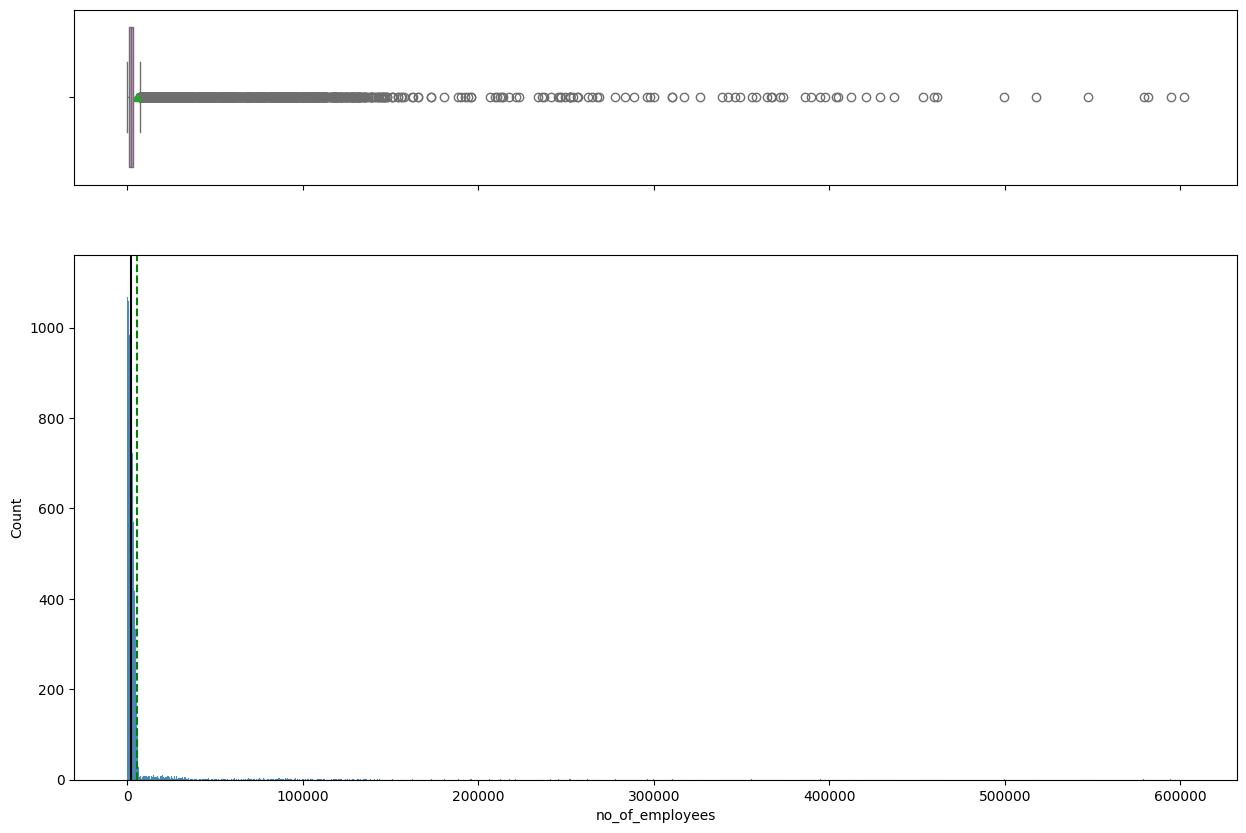

In [19]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

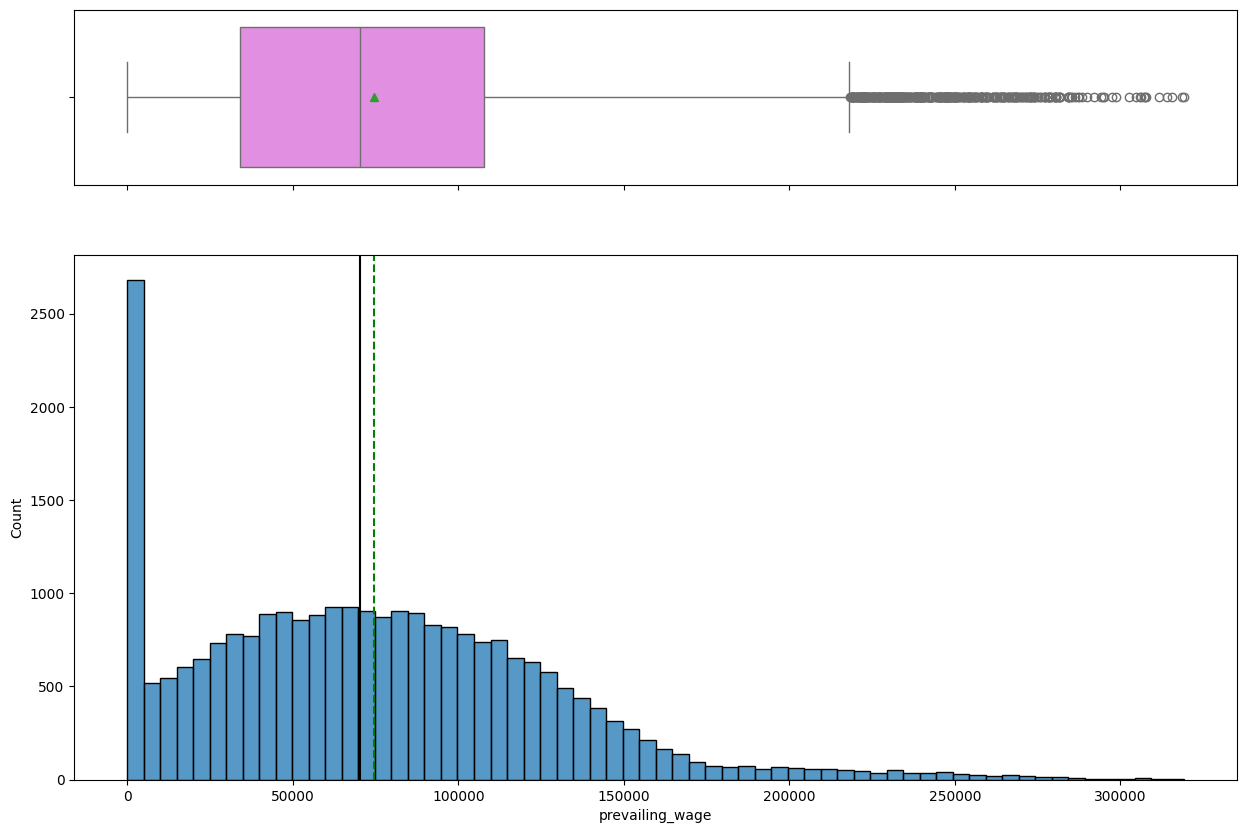

In [21]:
histogram_boxplot(data, 'prevailing_wage') ## Complete the code to create histogram_boxplot for prevailing wage

In [22]:
# checking the observations which have less than 100 prevailing wage
data.loc[data["prevailing_wage"] < 100] ## Complete the code to find the rows with less than 100 prevailing wage

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [23]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() ## Complete the code to get the count of the values in the mentioned column

Hour    176
Name: unit_of_wage, dtype: int64

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

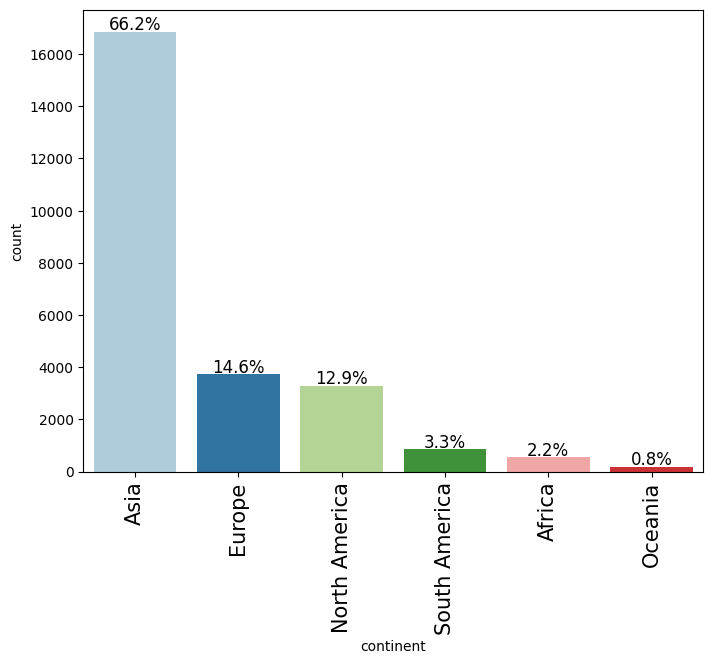

In [25]:
labeled_barplot(data, "continent", perc=True)

#### Observations on education of employee

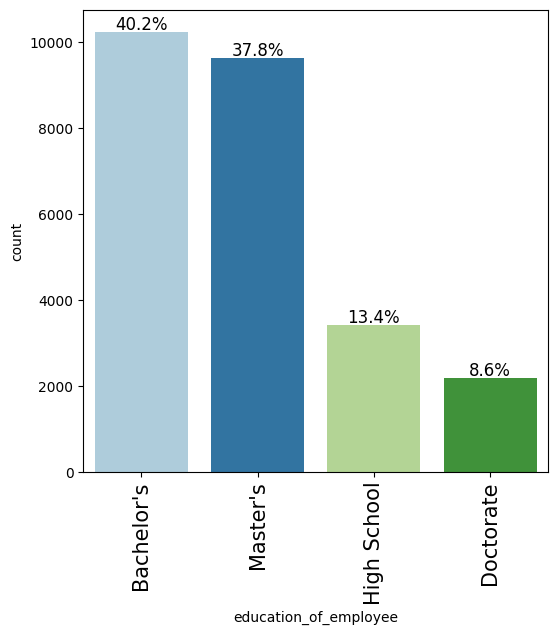

In [26]:
labeled_barplot(data, "education_of_employee", perc=True)  ## Complete the code to create labeled_barplot for education of employee

#### Observations on job experience

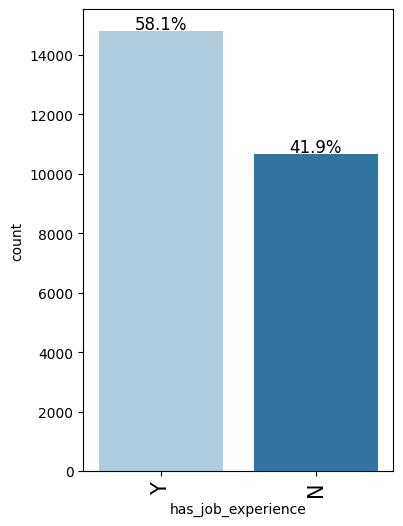

In [27]:
labeled_barplot(data, "has_job_experience", perc=True)  ## Complete the code to create labeled_barplot for job experience

#### Observations on job training

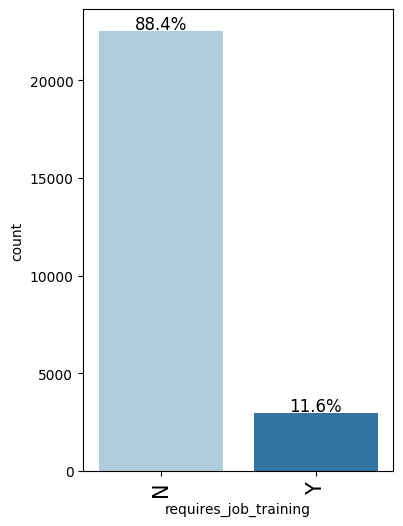

In [28]:
labeled_barplot(data, "requires_job_training", perc=True)  ## Complete the code to create labeled_barplot for job training

#### Observations on region of employment

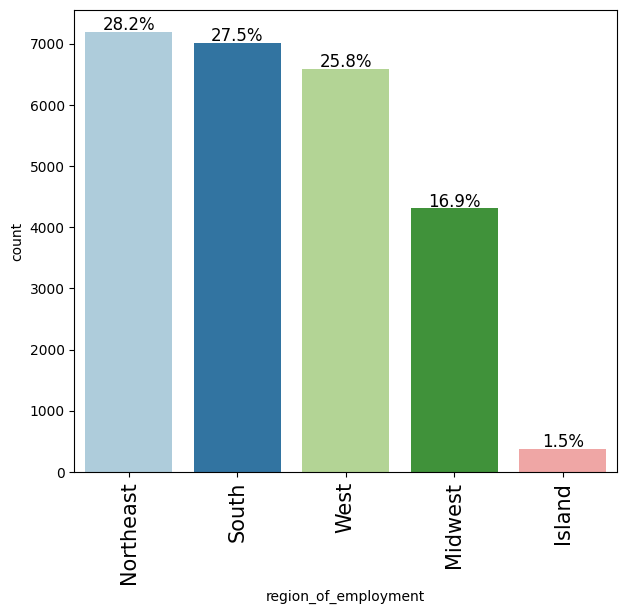

In [30]:
labeled_barplot(data, "region_of_employment", perc=True)  ## Complete the code to create labeled_barplot for region of employment

#### Observations on unit of wage

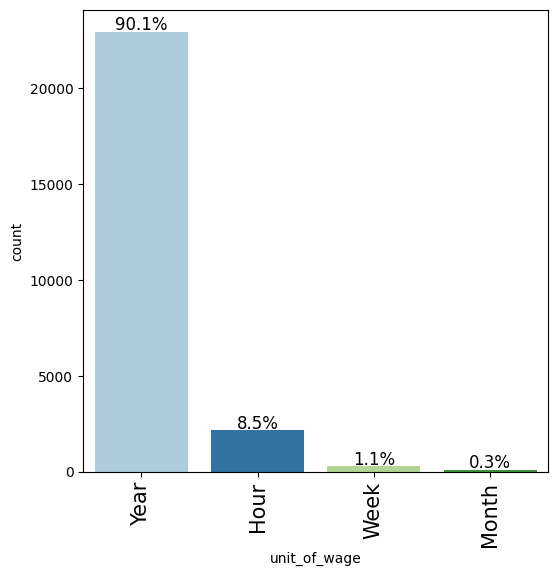

In [31]:
labeled_barplot(data, "unit_of_wage", perc=True)  ## Complete the code to create labeled_barplot for unit of wage

#### Observations on case status

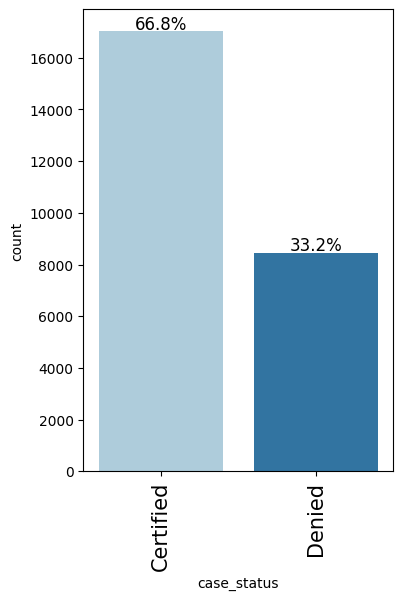

In [32]:
labeled_barplot(data, "case_status", perc=True)  ## Complete the code to create labeled_barplot for case status

### Bivariate Analysis

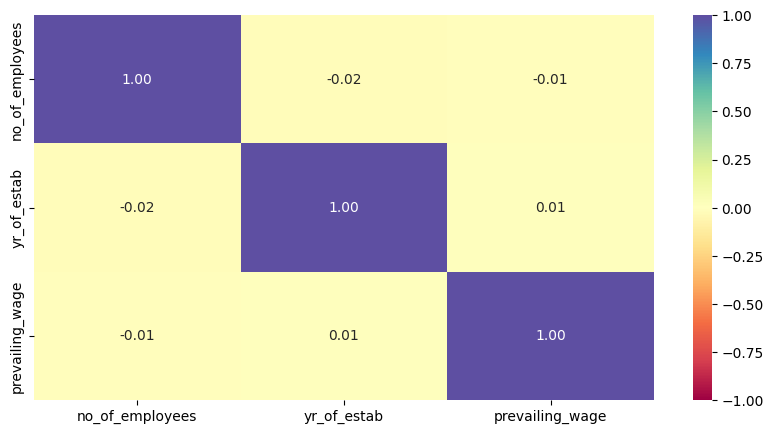

In [34]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

**Creating functions that will help us with further analysis.**

In [10]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [11]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


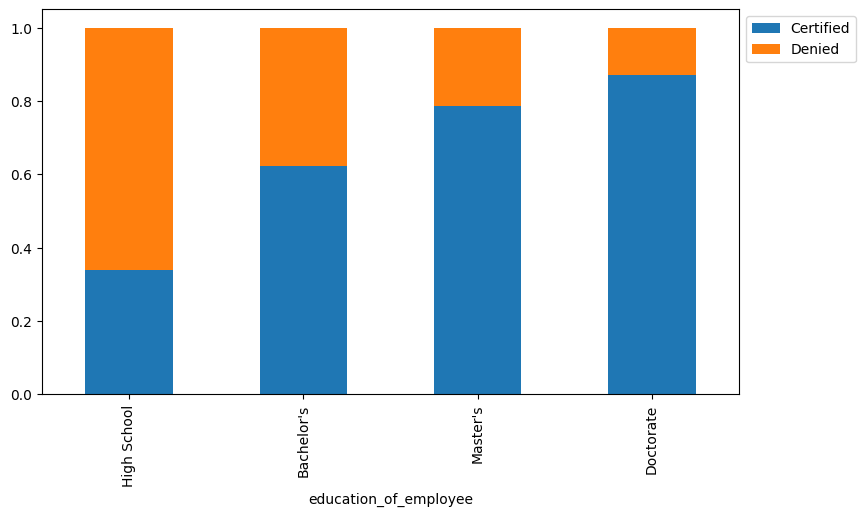

In [38]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

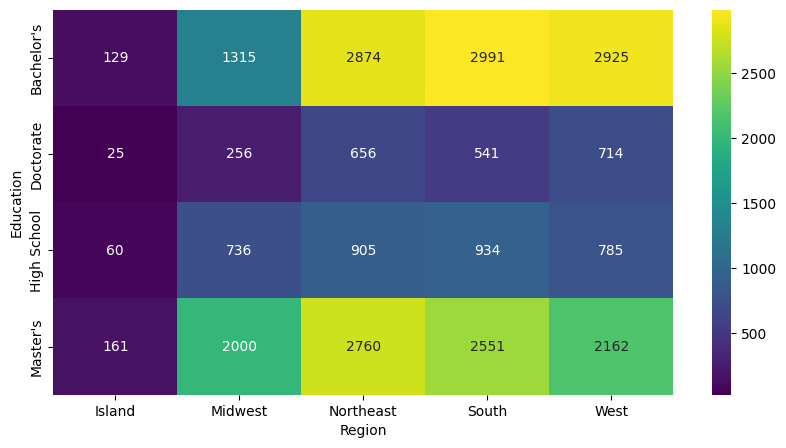

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


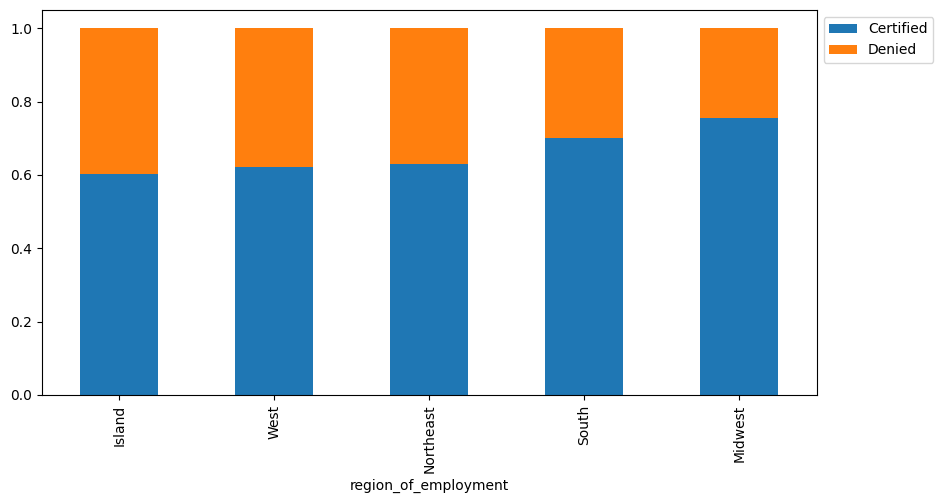

In [13]:
stacked_barplot(data, "region_of_employment", "case_status") ## Complete the code to plot stacked barplot for region of employment and case status

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


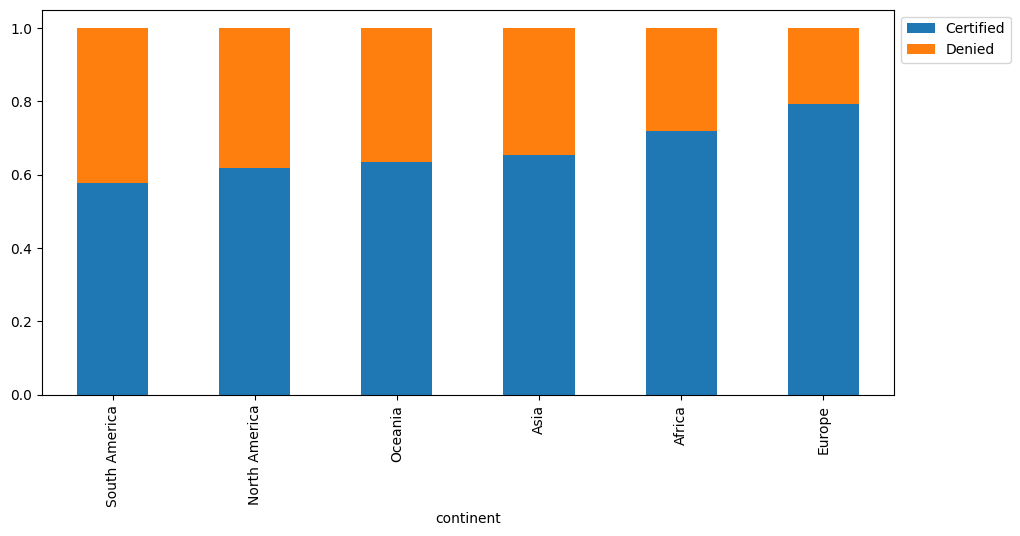

In [41]:
stacked_barplot(data, "continent", "case_status") ## Complete the code to plot stacked barplot for continent and case status

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


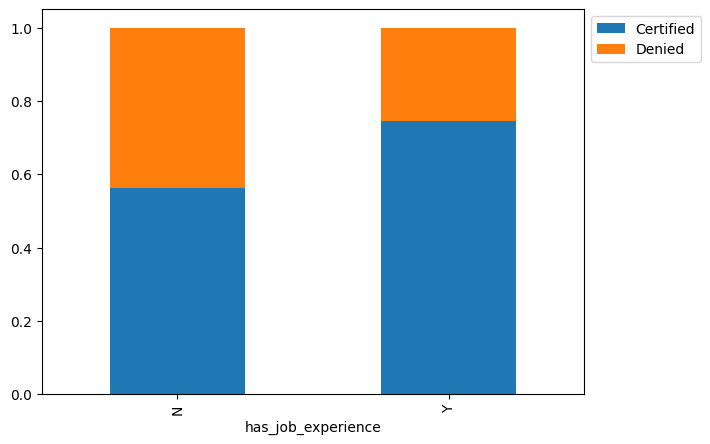

In [43]:
stacked_barplot(data, "has_job_experience", "case_status") ## Complete the code to plot stacked barplot for job experience and case status

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


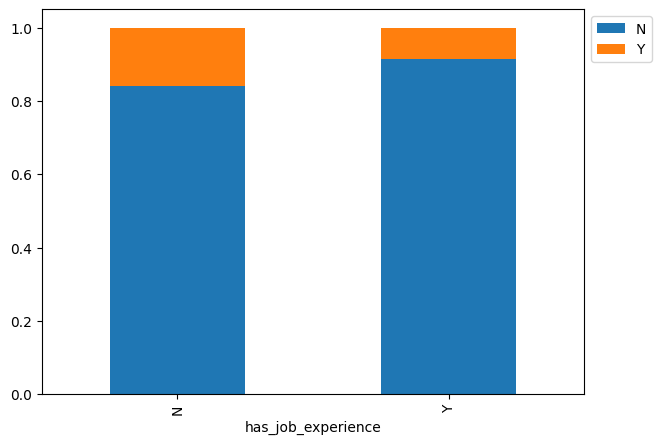

In [44]:
stacked_barplot(data, "has_job_experience", "requires_job_training") ## Complete the code to plot stacked barplot for job experience and requires_job_training

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

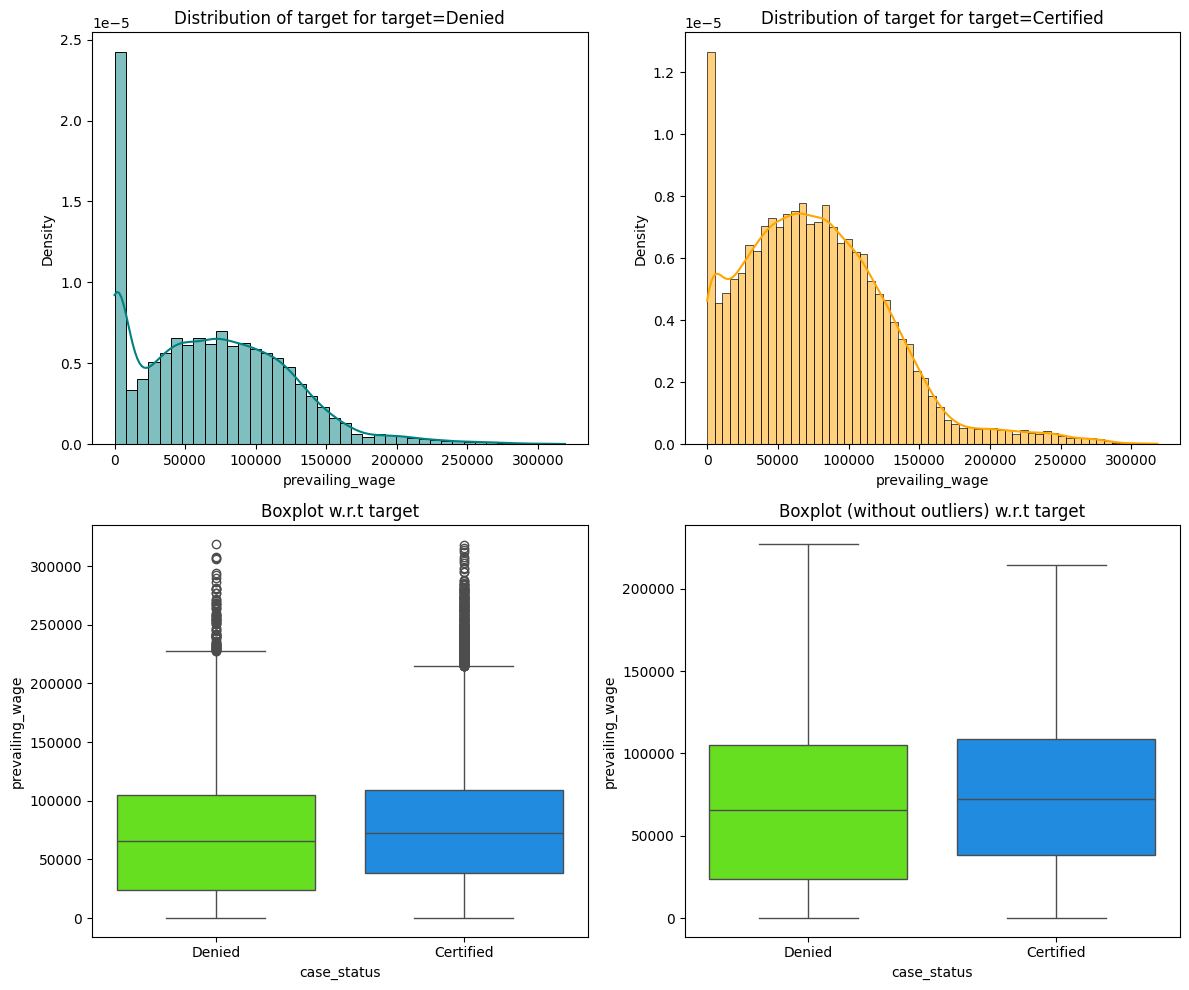

In [47]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status") ## Complete the code to find distribution of prevailing wage and case status

#### Checking if the prevailing wage is similar across all the regions of the US

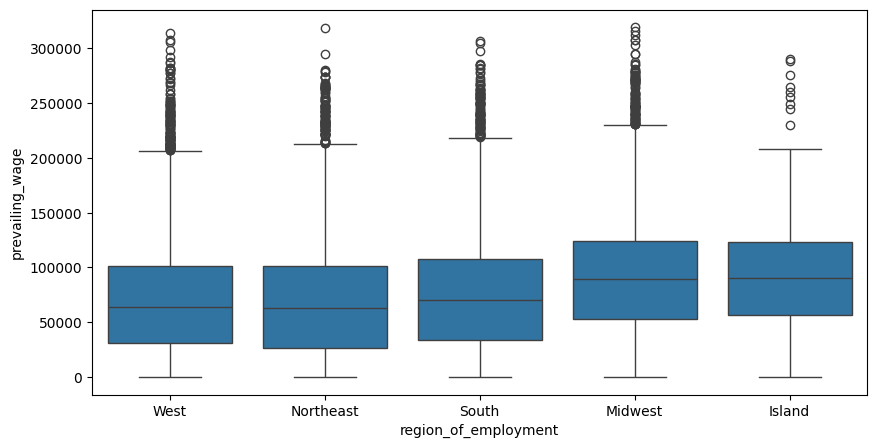

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(data, x="region_of_employment", y="prevailing_wage") ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


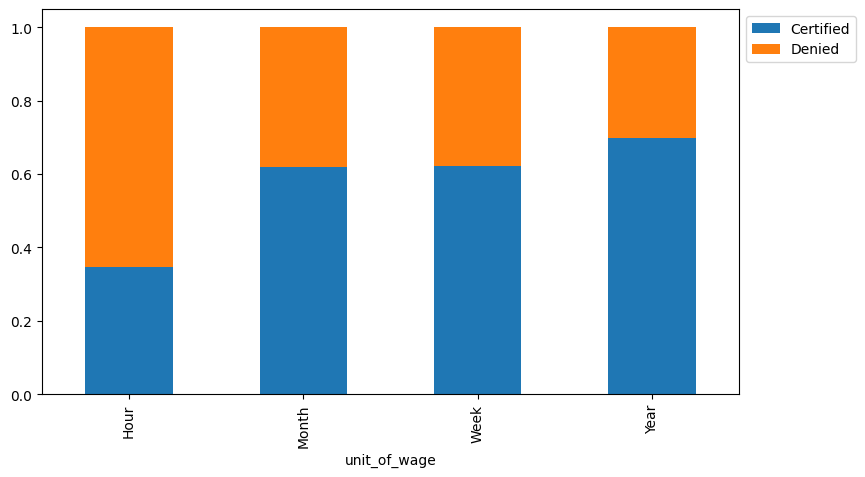

In [14]:
stacked_barplot(data, "unit_of_wage", "case_status") ## Complete the code to plot stacked barplot for unit of wage and case status

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

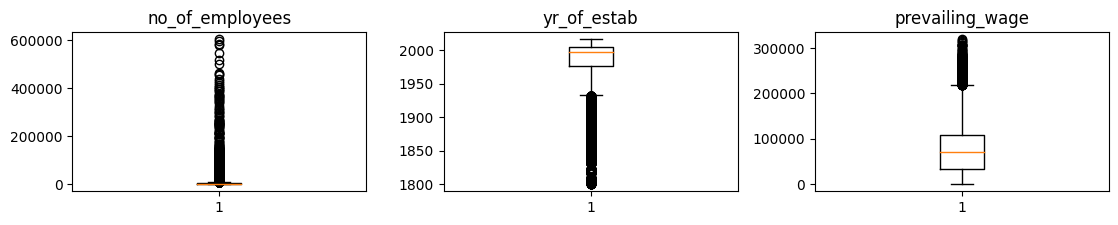

In [16]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [8]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)


In [9]:

X = data.drop("case_status", axis=1) ## Complete the code to drop case status from the data
Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)  ## Complete the code to create dummies for X


In [10]:

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, stratify=Y) ## Complete the code to split the data into train and test in the ratio 70:30

In [12]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (19110, 21)
Shape of test set :  (6370, 21)
Percentage of classes in training set:
1    0.66787
0    0.33213
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [14]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [15]:
model = DecisionTreeClassifier(random_state=1) ## Complete the code to define decision tree classifier with random state = 1
model.fit(X_train, y_train) ## Complete the code to fit decision tree classifier on the train data

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

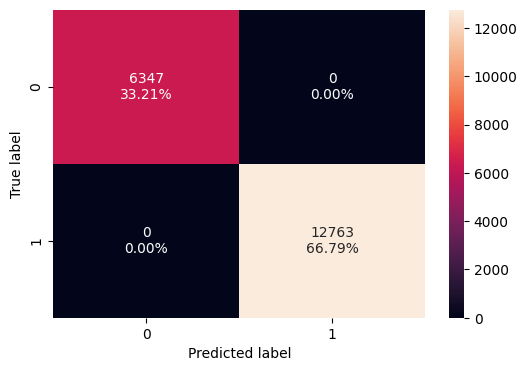

In [17]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [18]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

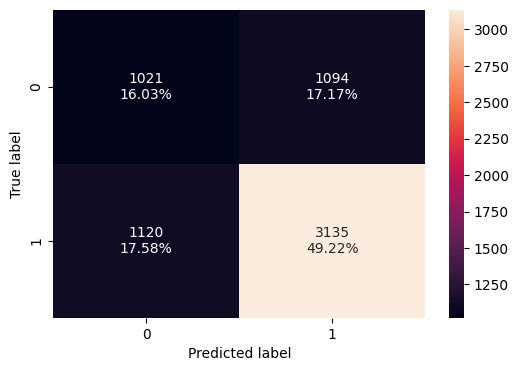

In [19]:
confusion_matrix_sklearn(model, X_test, y_test)

In [20]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.652433,0.73678,0.74131,0.739038


#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

### Hyperparameter Tuning - Decision Tree

In [22]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

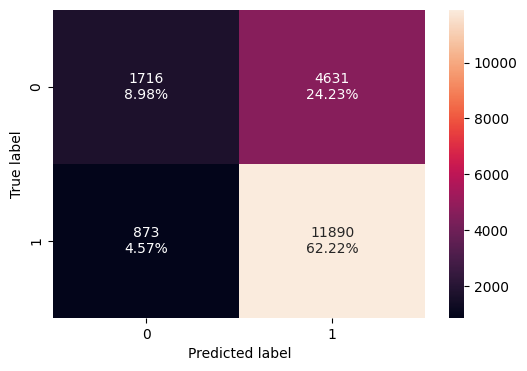

In [26]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [27]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.711983,0.931599,0.71969,0.812048


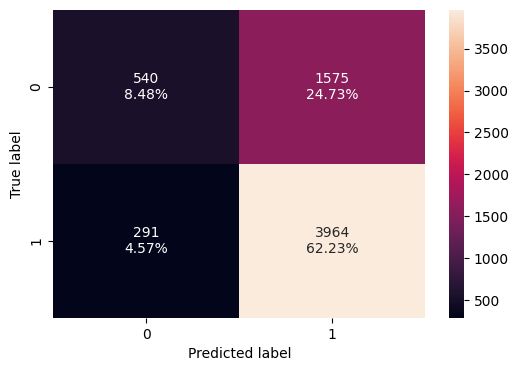

In [28]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [29]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.707064,0.93161,0.715653,0.809475


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [30]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

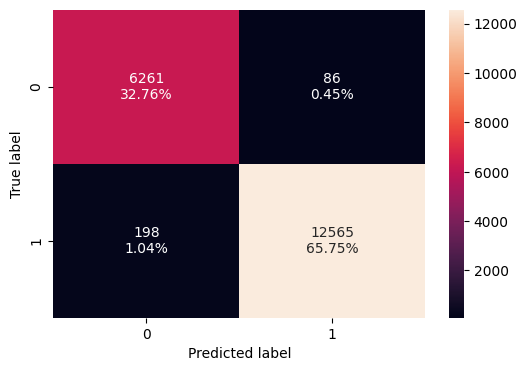

In [31]:
confusion_matrix_sklearn(bagging, X_train, y_train)

#### Checking model performance on training set

In [32]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging, X_train, y_train) ## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985139,0.984486,0.993202,0.988825


#### Checking model performance on test set

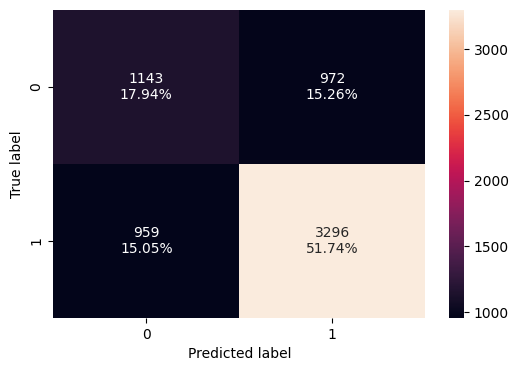

In [33]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [34]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging, X_test, y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.69686,0.774618,0.772259,0.773437


### Hyperparameter Tuning - Bagging Classifier

In [35]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=0.7, n_estimators=75,
                  random_state=1)

#### Checking model performance on training set

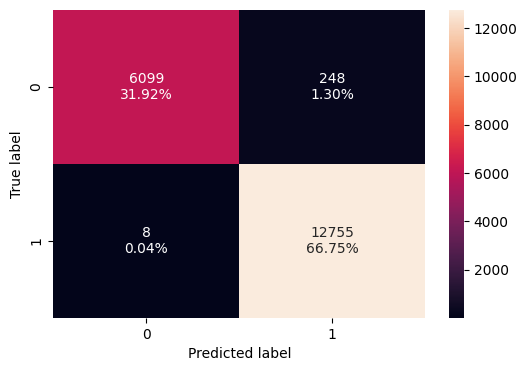

In [36]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [37]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.986604,0.999373,0.980927,0.990064


#### Checking model performance on test set

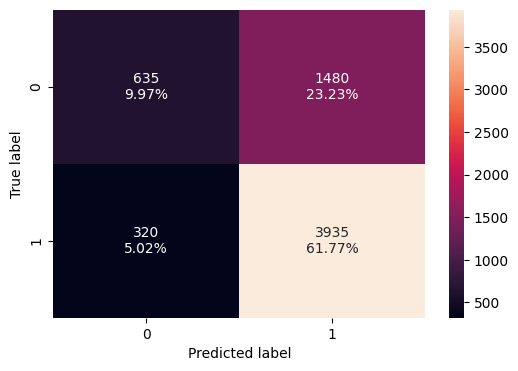

In [38]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [39]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.717425,0.924794,0.726685,0.813857


### Random Forest

In [40]:
rf = RandomForestClassifier(random_state=1, class_weight="balanced")
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

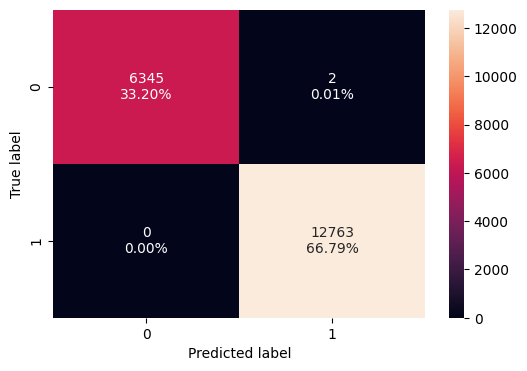

In [41]:
confusion_matrix_sklearn(rf, X_train, y_train)

In [42]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999895,1.0,0.999843,0.999922


#### Checking model performance on test set

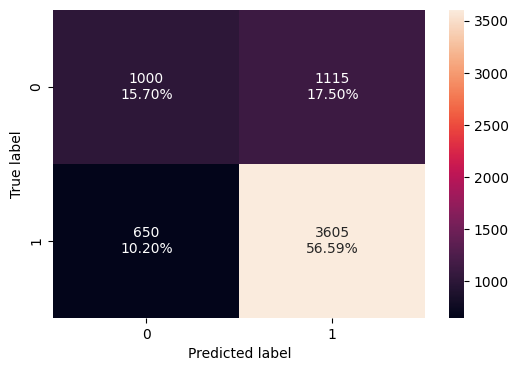

In [43]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [44]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72292,0.847239,0.763771,0.803343


### Hyperparameter Tuning - Random Forest

In [57]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

/home/mahakatas/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/mahakatas/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/mahakatas/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/mahakatas/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/mahakatas/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: So

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=30,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

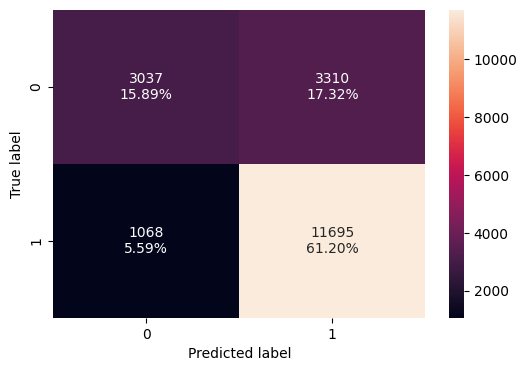

In [58]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [59]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.770905,0.916321,0.779407,0.842337


#### Checking model performance on test set

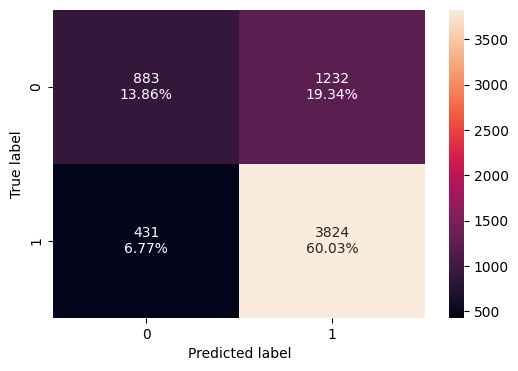

In [60]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [61]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738932,0.898707,0.756329,0.821394


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [50]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

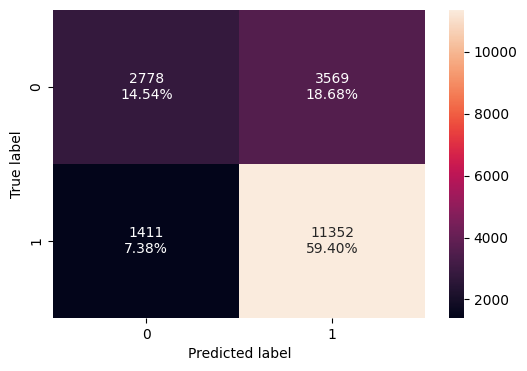

In [51]:
confusion_matrix_sklearn(abc, X_train, y_train)

In [52]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.739403,0.889446,0.760807,0.820113


#### Checking model performance on test set

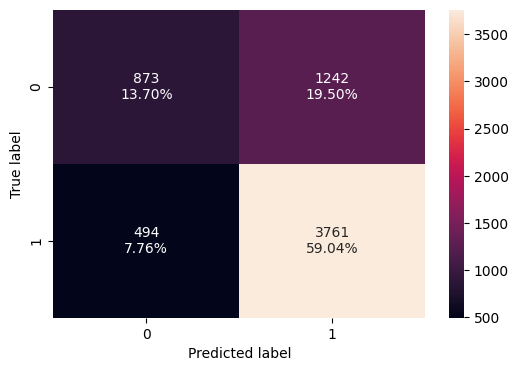

In [53]:
confusion_matrix_sklearn(abc, X_test, y_test)

In [54]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(abc, X_test, y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727473,0.883901,0.751749,0.812486


### Hyperparameter Tuning - AdaBoost Classifier

In [62]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

#### Checking model performance on training set

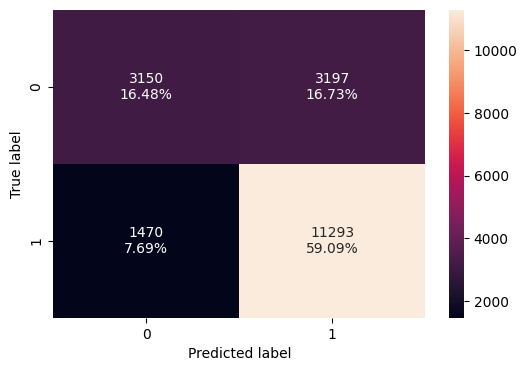

In [63]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [64]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.755782,0.884823,0.779365,0.828753


#### Checking model performance on test set

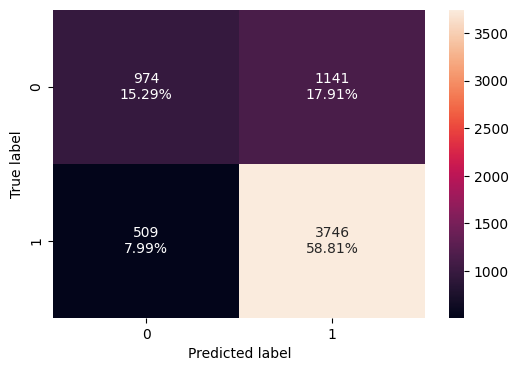

In [65]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [66]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740973,0.880376,0.766523,0.819514


### Gradient Boosting Classifier

In [67]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

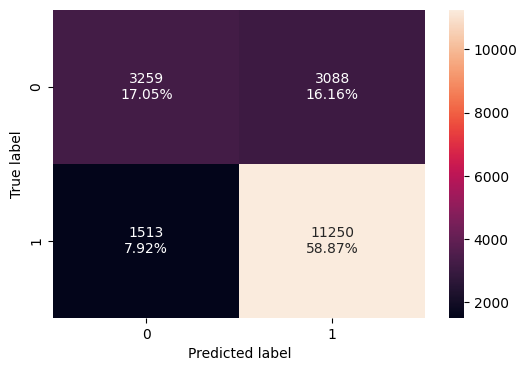

In [68]:
confusion_matrix_sklearn(gbc, X_train, y_train)

In [69]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train) ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759236,0.881454,0.784628,0.830228


#### Checking model performance on test set

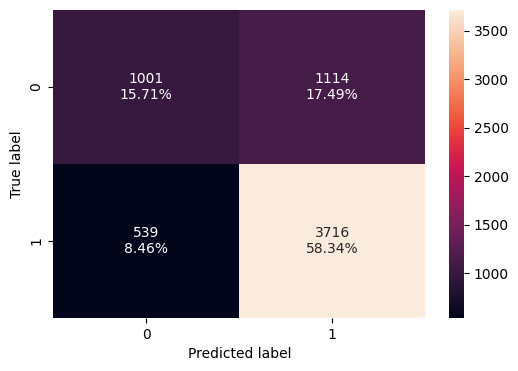

In [70]:
confusion_matrix_sklearn(gbc, X_test, y_test)

In [71]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gbc, X_test, y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740502,0.873325,0.769358,0.818052


### Hyperparameter Tuning - Gradient Boosting Classifier

In [73]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.8, random_state=1,
                           subsample=0.7)

#### Checking model performance on training set

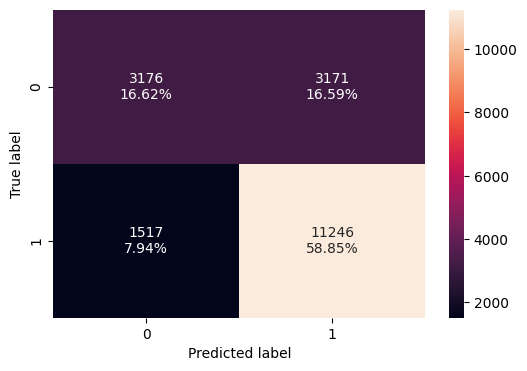

In [74]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [75]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754683,0.881141,0.780051,0.82752


#### Checking model performance on test set

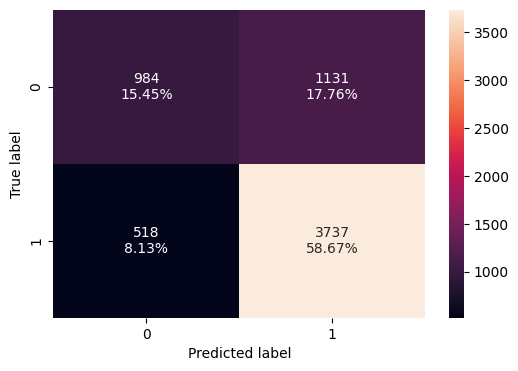

In [76]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [78]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74113,0.878261,0.767666,0.819248


### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [79]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

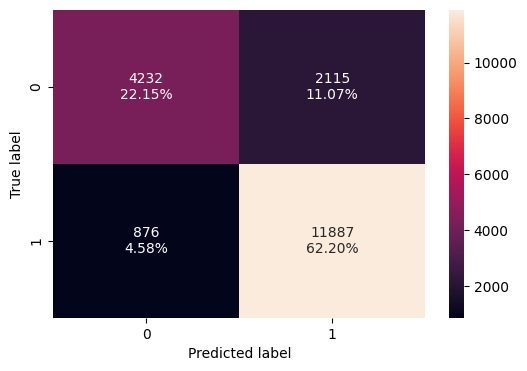

In [80]:
confusion_matrix_sklearn(xgb, X_train, y_train)

In [81]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb, X_train,y_train) ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.843485,0.931364,0.84895,0.88825


#### Checking model performance on test set

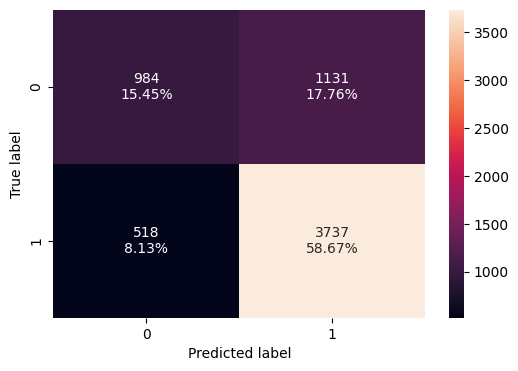

In [82]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [83]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb, X_test, y_test) ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.729513,0.859224,0.764854,0.809297


### Hyperparameter Tuning - XGBoost Classifier

In [85]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb, parameters, scoring=acc_scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

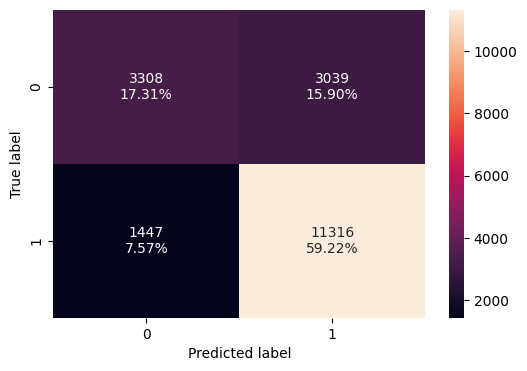

In [86]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [87]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765254,0.886625,0.788297,0.834575


#### Checking model performance on test set

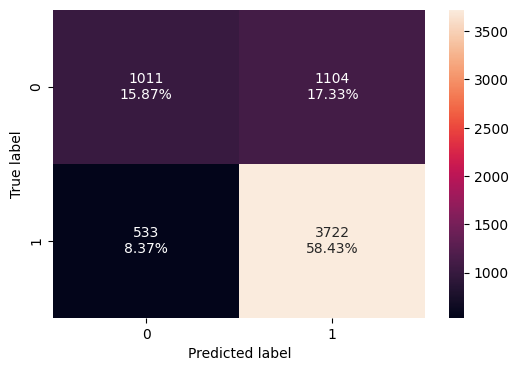

In [88]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [89]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743014,0.874736,0.771239,0.819734


## Stacking Classifier

In [90]:
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned


In [91]:

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5) ## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train, y_train) ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.060000000000000005,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=...
                                                 feature_types=None, gamma=1,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

### Checking model performance on training set

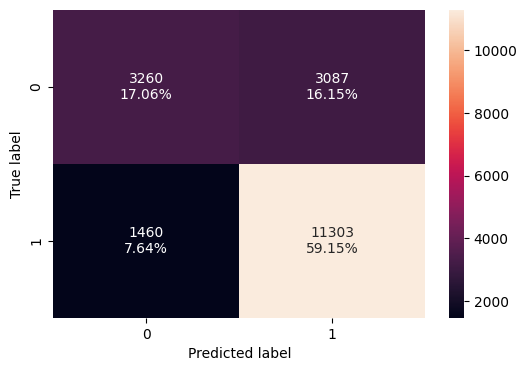

In [92]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [93]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train) ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.762062,0.885607,0.785476,0.832542


### Checking model performance on test set

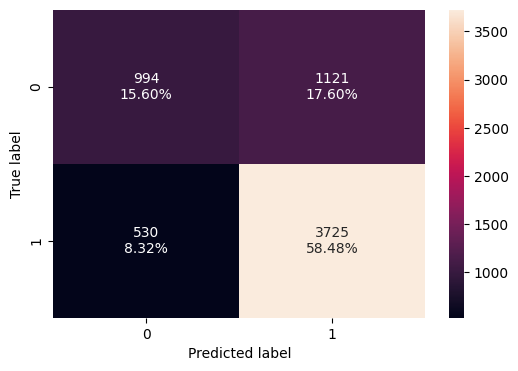

In [94]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [95]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740816,0.875441,0.768675,0.818591


## Model Performance Comparison and Final Model Selection

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.711983,0.985139,0.986604,0.999895,0.770905,0.739403,0.755782,0.759236,0.754683,0.843485,0.765254,0.762062
Recall,1.0,0.931599,0.984486,0.999373,1.000000,0.916321,0.889446,0.884823,0.881454,0.881141,0.931364,0.886625,0.885607
Precision,1.0,0.719690,0.993202,0.980927,0.999843,0.779407,0.760807,0.779365,0.784628,0.780051,0.848950,0.788297,0.785476
F1,1.0,0.812048,0.988825,0.990064,0.999922,0.842337,0.820113,0.828753,0.830228,0.827520,0.888250,0.834575,0.832542


In [97]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652433,0.707064,0.696860,0.717425,0.722920,0.738932,0.727473,0.740973,0.740502,0.741130,0.729513,0.743014,0.740816
Recall,0.736780,0.931610,0.774618,0.924794,0.847239,0.898707,0.883901,0.880376,0.873325,0.878261,0.859224,0.874736,0.875441
Precision,0.741310,0.715653,0.772259,0.726685,0.763771,0.756329,0.751749,0.766523,0.769358,0.767666,0.764854,0.771239,0.768675
F1,0.739038,0.809475,0.773437,0.813857,0.803343,0.821394,0.812486,0.819514,0.818052,0.819248,0.809297,0.819734,0.818591


### Important features of the final model

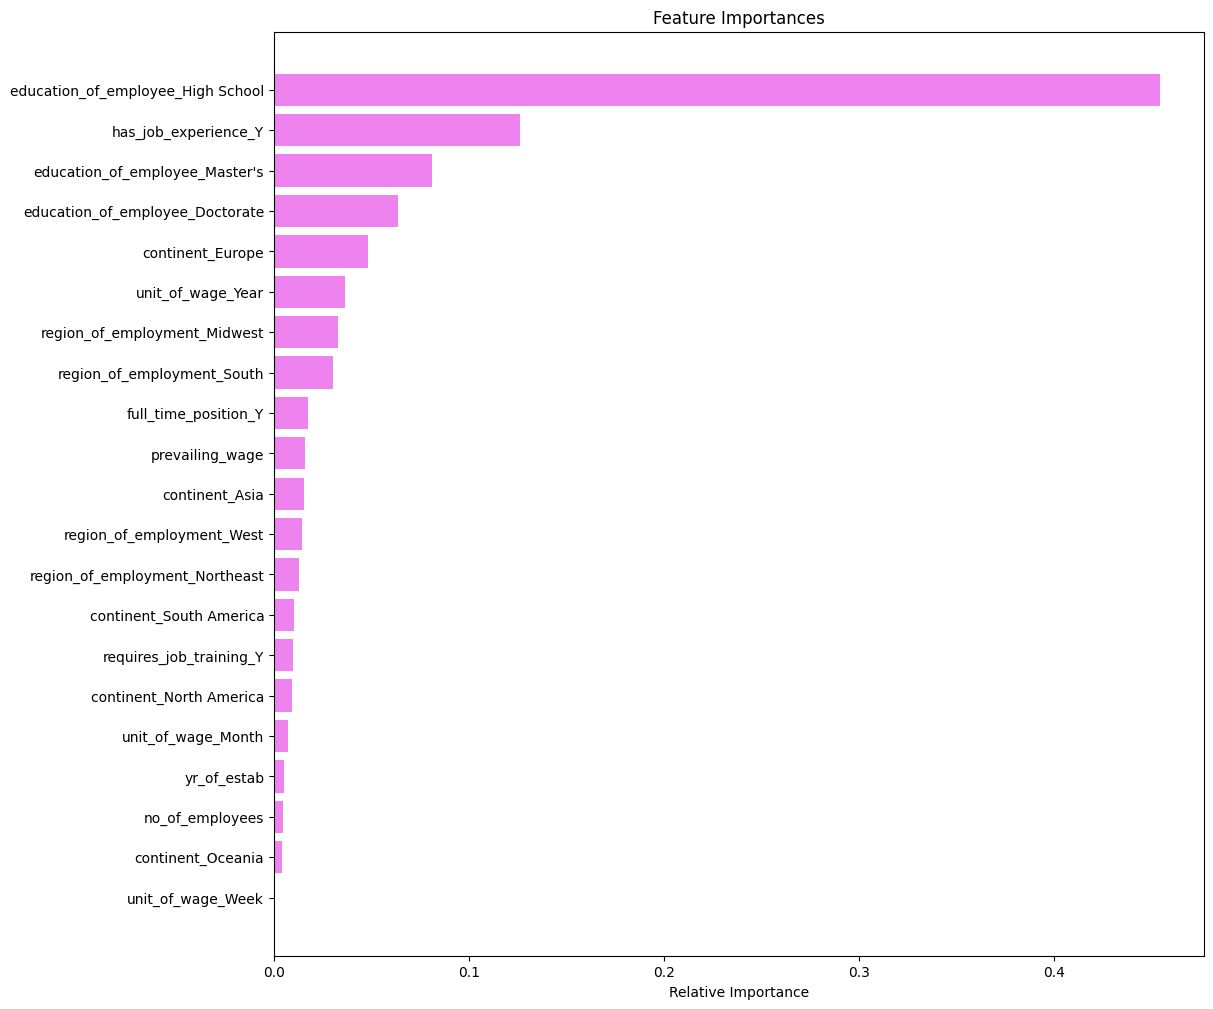

In [105]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

-


___